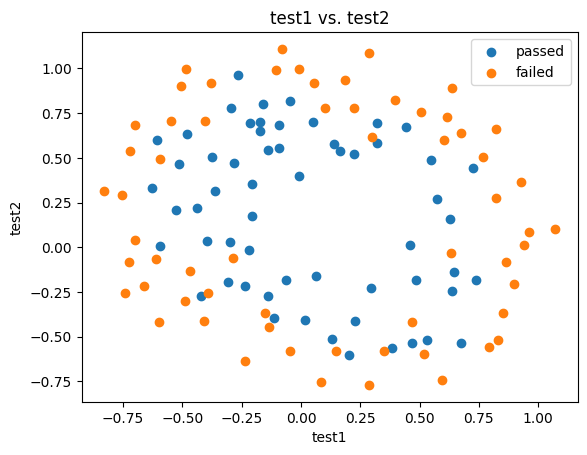

In [2]:
# load data
import pandas as pd
import numpy as np

data = pd.read_csv("chip_test.csv")
data.head()

mask = data.loc[:, "pass"] == 1

# visualized data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
passed = plt.scatter(
    data.loc[:, "test1"][mask],
    data.loc[:, "test2"][mask]
)
failed = plt.scatter(
    data.loc[:, "test1"][~mask],
    data.loc[:, "test2"][~mask]
)
plt.title("test1 vs. test2")
plt.xlabel("test1")
plt.ylabel("test2")
plt.legend((passed, failed), ("passed", "failed"))
plt.show()


In [3]:
# prepare data
X = data.drop(["pass"], axis=1)
y = data.loc[:, "pass"]
X1 = data.loc[:, "test1"]
X2 = data.loc[:, "test2"]
X1.head()

# create new data (2次)
X1_2 = X1 * X1
X2_2 = X2 * X2
X1_X2 = X1 * X2

X_new = {
    "X1": X1,
    "X2": X2,
    "X1^2": X1_2,
    "X2^2": X2_2,
    "X1X2": X1_X2,
}
X_new = pd.DataFrame(X_new)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR2 = LogisticRegression()
LR2.fit(X_new, y)

y_pred_2 = LR2.predict(X_new)
accuracy2 = accuracy_score(y, y_pred_2)
print(accuracy2)

0.8135593220338984


/Users/jiaronghe/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


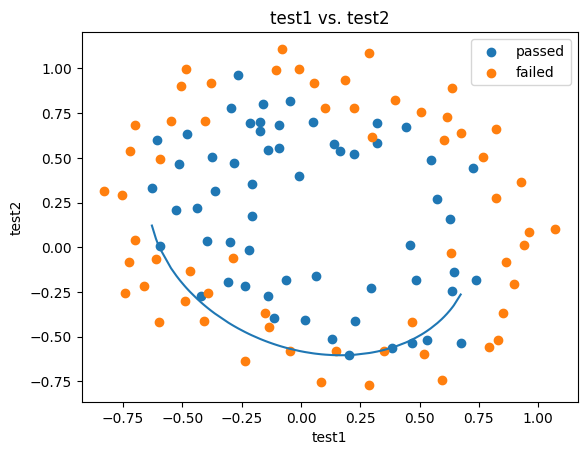

In [6]:
# 曲线函数
X1_new = X1.sort_values()

_theta0 = LR2.intercept_
_theta1,_theta2,_theta3,_theta4,_theta5 = LR2.coef_[0][0], LR2.coef_[0][1], LR2.coef_[0][2], LR2.coef_[0][3], LR2.coef_[0][4]

a = _theta4
b = _theta5 * X1_new + _theta2
c = _theta0 + _theta1 * X1_new + _theta3*X1_new*X1_new

X2_new_boundary = (-b+np.sqrt(b*b-4*a*c)) / (2*a)

fig4 = plt.figure()
passed = plt.scatter(
    data.loc[:, "test1"][mask],
    data.loc[:, "test2"][mask]
)
failed = plt.scatter(
    data.loc[:, "test1"][~mask],
    data.loc[:, "test2"][~mask]
)
plt.title("test1 vs. test2")
plt.xlabel("test1")
plt.ylabel("test2")
plt.legend((passed, failed), ("passed", "failed"))
plt.plot(X1_new, X2_new_boundary)
plt.show()

In [8]:
# 曲线函数 v2

def f(x):
    a = _theta4
    b = _theta5 * x + _theta2
    c = _theta0 + _theta1 * x + _theta3*x*x
    X2_new_boundary_1 = (-b+np.sqrt(b*b-4*a*c)) / (2*a)
    X2_new_boundary_2 = (-b-np.sqrt(b*b-4*a*c)) / (2*a)

    return X2_new_boundary_1, X2_new_boundary_2

/private/tmp/PKInstallSandbox.6hRVfG/tmp/ipykernel_82952/3772028118.py:7: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary_1 = (-b+np.sqrt(b*b-4*a*c)) / (2*a)
/private/tmp/PKInstallSandbox.6hRVfG/tmp/ipykernel_82952/3772028118.py:8: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary_2 = (-b-np.sqrt(b*b-4*a*c)) / (2*a)


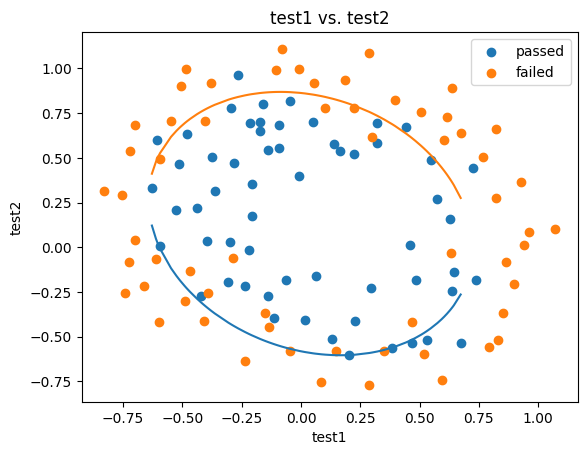

In [9]:
X2_new_boundary_1 = []
X2_new_boundary_2 = []

for x in X1_new:
    X2_new_boundary_1.append(f(x)[0])
    X2_new_boundary_2.append(f(x)[1])

fig5 = plt.figure()
passed = plt.scatter(
    data.loc[:, "test1"][mask],
    data.loc[:, "test2"][mask]
)
failed = plt.scatter(
    data.loc[:, "test1"][~mask],
    data.loc[:, "test2"][~mask]
)
plt.title("test1 vs. test2")
plt.xlabel("test1")
plt.ylabel("test2")
plt.legend((passed, failed), ("passed", "failed"))
plt.plot(X1_new, X2_new_boundary_1)
plt.plot(X1_new, X2_new_boundary_2)
plt.show()

/private/tmp/PKInstallSandbox.6hRVfG/tmp/ipykernel_82952/3772028118.py:7: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary_1 = (-b+np.sqrt(b*b-4*a*c)) / (2*a)
/private/tmp/PKInstallSandbox.6hRVfG/tmp/ipykernel_82952/3772028118.py:8: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary_2 = (-b-np.sqrt(b*b-4*a*c)) / (2*a)


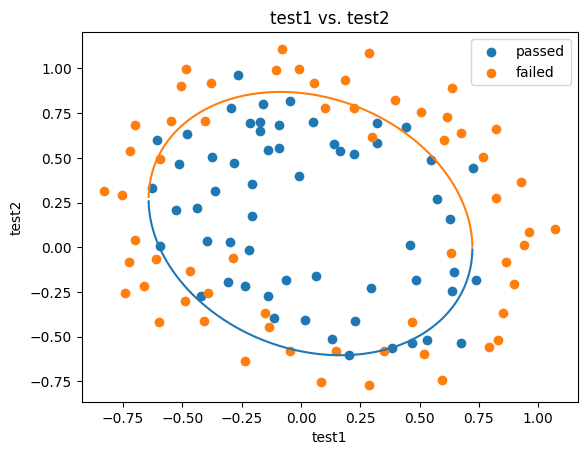

In [11]:
X1_range = [-0.9 + x/10000 for x in range(0, 19000)]
X1_range = np.array(X1_range)

X2_new_boundary_1 = []
X2_new_boundary_2 = []

for x in X1_range:
    X2_new_boundary_1.append(f(x)[0])
    X2_new_boundary_2.append(f(x)[1])

fig6 = plt.figure()
passed = plt.scatter(
    data.loc[:, "test1"][mask],
    data.loc[:, "test2"][mask]
)
failed = plt.scatter(
    data.loc[:, "test1"][~mask],
    data.loc[:, "test2"][~mask]
)
plt.title("test1 vs. test2")
plt.xlabel("test1")
plt.ylabel("test2")
plt.legend((passed, failed), ("passed", "failed"))
plt.plot(X1_range, X2_new_boundary_1)
plt.plot(X1_range, X2_new_boundary_2)
plt.show()